# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset, but on a new and very interesting dataset. We'll use the [Predict'em All](https://www.kaggle.com/semioniy/predictemall) dataset from Kaggle (download the dataset directly from them). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), having coordinates, time, weather, population density, distance to pokestops/ gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to ping-pong must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. [The python docs](https://docs.python.org/3/), [keras docs](https://keras.io/), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

## 0. Imports

Import any necessary modules here.

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
from tensorflow import keras as ke

## 1. Loading and extracting subset

Load the `'300k.csv'` file using pandas.

In [2]:
pokeData = pd.read_csv('300k.csv',delimiter=',')

C:\Users\bjorn\AppData\Local\conda\conda\envs\dml\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [3]:
redPokeData = pd.DataFrame(pokeData,columns={'latitude','longitude','class'}) 

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [4]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [5]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td>![Diglett](https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png)</td>
    <td>![Seel](https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf)</td>
    <td>![Tauros](https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616)</td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [6]:
(a,b,c) = (name_dict['Diglett'],name_dict['Seel'],name_dict['Tauros'])
tmp = redPokeData['class'].isin([a,b,c])
filtRedPokeData = redPokeData.loc[tmp]

## 2. Visualization of the dataset

Plot histogram of the number of occurrences of each class.

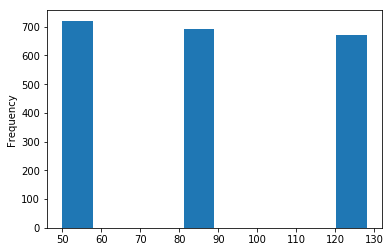

In [7]:
% matplotlib inline
filtRedPokeData['class'].plot(kind='hist',legend=False)

Is the dataset balanced?

**Your answer**: Yes, we have aprox. equally many from the different classes

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

Text(0,0.5,'longitude')

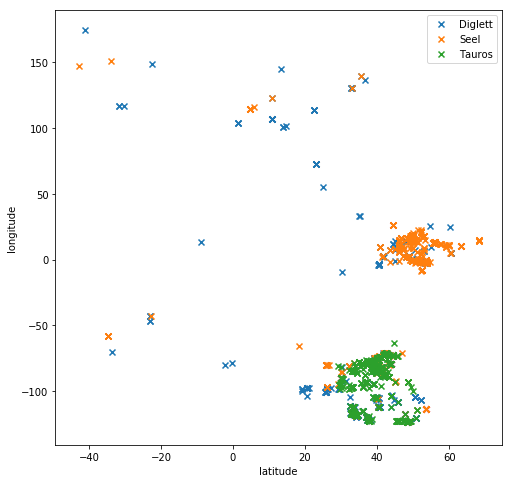

In [8]:
%matplotlib inline
fig, ax = plt.pyplot.subplots(figsize=(8,8))
groupedPoke=filtRedPokeData.groupby('class')
for name,pokeClass in groupedPoke:
    ax.scatter(pokeClass['latitude'], pokeClass['longitude'], marker="x",label=name_dict[name])   
ax.legend()
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')



Is there any other visualization you think would be useful? If so, insert it here.

How hard do you think the problem is? Which classes can/cannot be easily separated?

**Your answer**: (fill in here)

Which accuracy do you expect to achieve?

**Your answer**: (fill in here)

## 3. Preprocessing

Prepare input and output vectors.

In [9]:
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
inputMatrix = np.vstack((filtRedPokeData['latitude'],filtRedPokeData['longitude']))

inputMatrix = inputMatrix.T
outputVec = filtRedPokeData['class'].values
#Create one-hot encoder  
le = preprocessing.LabelEncoder()
le.fit(outputVec) #maps classes 50,86,128 to 0,1,2
outputOneHot = OneHotEncoder(le.transform(outputVec),sparse=False)
#print(outputVec)
print(le.transform(outputVec))
#print(outputOneHot)
oneHot=np.zeros((outputOneHot.n_values.size,3),dtype='int8')
oneHot[np.arange(oneHot.shape[0]),le.transform(outputVec)]=1
print(oneHot)

[0 2 2 ... 1 1 2]
[[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 0 1]]


Separate your data into training and test sets. 20% of the data should be in the test set.

In [10]:
from sklearn.model_selection import train_test_split
inputTrain,inputTest,outputTrain,outputTest = train_test_split(inputMatrix,oneHot,test_size=0.2)

## 4. Training

Choose an architecture for your network.

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
inputSize=2
n=100
model = Sequential()
model.add(Dense(n,activation='relu',input_shape=(inputSize,)))
model.add(Dropout(0.2))
model.add(Dense(n,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Using TensorFlow backend.


Train the network. When training, separate 25% of your training data into a validation set.

In [12]:
model.fit(inputTrain,outputTrain,epochs=30,batch_size=512,validation_split=0.25)


Train on 1249 samples, validate on 417 samples
Epoch 1/30
1249/1249 [==============================] - 1s 448us/step - loss: 6.8853 - acc: 0.3026 - val_loss: 3.0547 - val_acc: 0.5707
Epoch 2/30
1249/1249 [==============================] - 0s 21us/step - loss: 4.7025 - acc: 0.4371 - val_loss: 2.6004 - val_acc: 0.5707
Epoch 3/30
1249/1249 [==============================] - 0s 17us/step - loss: 4.3061 - acc: 0.4812 - val_loss: 2.5555 - val_acc: 0.6355
Epoch 4/30
1249/1249 [==============================] - 0s 20us/step - loss: 4.2491 - acc: 0.4932 - val_loss: 2.5359 - val_acc: 0.6043
Epoch 5/30
1249/1249 [==============================] - 0s 18us/step - loss: 3.9949 - acc: 0.5220 - val_loss: 2.5651 - val_acc: 0.6379
Epoch 6/30
1249/1249 [==============================] - 0s 16us/step - loss: 3.6861 - acc: 0.5348 - val_loss: 2.5233 - val_acc: 0.6379
Epoch 7/30
1249/1249 [==============================] - 0s 25us/step - loss: 3.7182 - acc: 0.5300 - val_loss: 2.4856 - val_acc: 0.6283
Epoch 8

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [13]:
score=model.evaluate(inputTest,outputTest)

417/417 [==============================] - 0s 30us/step


Compute the confusion matrix of your predictions on the test set.

Automatically created module for IPython interactive environment
[[0.7  0.17 0.13]
 [0.13 0.61 0.26]
 [0.33 0.   0.67]]


C:\Users\bjorn\AppData\Local\conda\conda\envs\dml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\bjorn\AppData\Local\conda\conda\envs\dml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


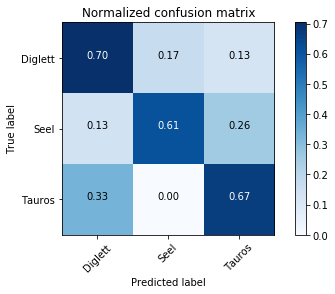

In [37]:
#Code borrowed from the internet (http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Calculate predictions
yPred =np.argmax(model.predict(inputTest),axis=1)
# Store true
yTrue = np.argmax(outputTest,axis=1)
class_names=le.inverse_transform([ 0, 1, 2])

classIndex=le.inverse_transform([0,1,2])
class_names=[name_dict[classIndex[0]],name_dict[classIndex[1]],name_dict[classIndex[2]]]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yTrue, yPred)
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Answer**: I could loop over combinations of latitude and longitude to find the probability of finding the pokemons at each lat/long pair. When you have constructed this "heat map" of probailities you could simpy travel to the lat/long with highest probability. You could also weight the effort to travel to a specigic point. i.e. you could decide to travel to a point closer to you but with a lower probability rather than traveling far to achive a slightly higher probability

Is(are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer**: I think hour of the day could be benificial to look at. A certain class of pokemon might only be present at night for example.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

Text(0.5,1,'Tauros')

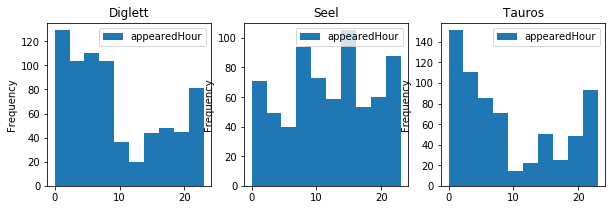

In [39]:
fig, ax = plt.pyplot.subplots(1,3,figsize=(10,3))
filterdTimeData=pd.DataFrame(pokeData,columns={'class','appearedHour'}) 
(a,b,c) = (name_dict['Diglett'],name_dict['Seel'],name_dict['Tauros'])
Diglett = filterdTimeData.loc[filterdTimeData['class'].isin([a])]
Seel = filterdTimeData.loc[filterdTimeData['class'].isin([b])]
Tauros = filterdTimeData.loc[filterdTimeData['class'].isin([c])]
ax[0] = Diglett['appearedHour'].plot(kind='hist',legend=True,ax=ax[0])
ax[0].set_title('Diglett')
ax[1] = Seel['appearedHour'].plot(kind='hist',legend=True,ax=ax[1])
ax[1].set_title('Seel')
ax[2] = Tauros['appearedHour'].plot(kind='hist',legend=True,ax=ax[2])
ax[2].set_title('Tauros')

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer**: Since the the histograms are not uniform (equal height of bins) the hour of the day seems to hold information on when it's more likely to capture a certain pokemon and therefore it would be benificial to add this feature as input.

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?